# Simple RNN (Many-to-one 문제)
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 그래프 위 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만든다.

- 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = np.sin(np.arange(21) * np.pi/4.) # pi / 4 는 45도
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

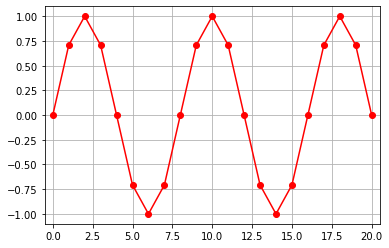

In [3]:
plt.plot(s, 'ro-')
plt.xlim(-0.5,20.5), plt.ylim(-1.1,1.1), plt.grid()
plt.show()

- X_train, y_train 데이터 만들기
1. 3개씩 18개의 데이터 생성 (len(s)-3) 만듬
2. (len(s)-3) : 18개의 데이터를 만들어야되는데 21개의 데이터값을 가져서

In [5]:

X_train = []
y_train = np.empty(len(s)-3) 
for i in range(len(s)-3):
    X_train.append(s[i:i+3])
    y_train[i] = s[i+3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [9]:
X_train = np.array(X_train).reshape(-1,3,1) # 3차원 (3개의 순서열을 가진 데이터) :input dim이 얼마인지 알아야되서
X_train.shape # 입력 데이터 갯수, timesteps, input dim
# 하나의 노드의 [0,0,0]이런식으로 데이터가 들어간다.(입력 sequence) 

(18, 3, 1)

In [10]:
X_train[0]

array([[0.        ],
       [0.70710678],
       [1.        ]])

- 데이터 설정

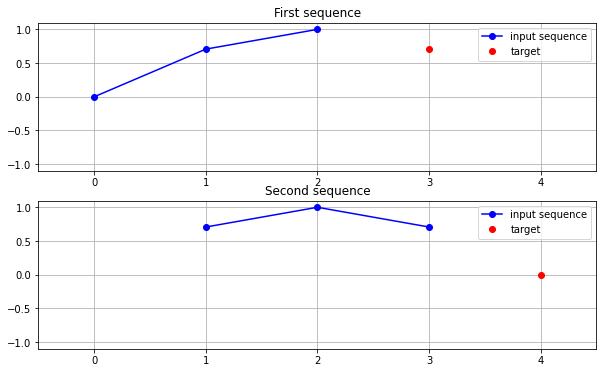

In [14]:
plt.figure(figsize = (10,6))
plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label ='input sequence')
plt.plot([3], y_train[0], 'ro', label = 'target')
plt.xlim(-0.5, 4.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('First sequence')


plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label ='input sequence')
plt.plot([4], y_train[1], 'ro', label = 'target')
plt.xlim(-0.5, 4.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('Second sequence')

plt.show()

- 순환 신경망 모델 정의/설정

In [16]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [19]:
np.__version__ # version 1.20.2에서는 아래 모델 정의가 안됨

'1.19.5'

In [21]:
model = Sequential([
                    SimpleRNN(10, input_shape = X_train.shape[1:], activation= 'tanh'),                  # 은닉층의 갯수는 맘대로
                    Dense(1, activation= 'linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer= 'adam', loss = 'mse')

- 모델 학습전

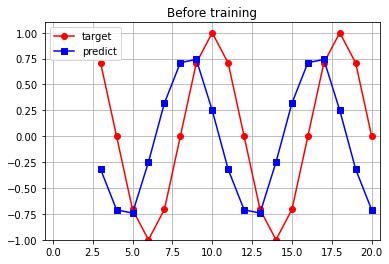

In [25]:
plt.plot(np.arange(3,21),y_train, 'ro-', label = 'target')
plt.plot(np.arange(3,21), model.predict(X_train), 'bs-', label = 'predict')
plt.xlim(-0.5, 20.5), plt.ylim(-1,1.1), plt.grid()
plt.legend(), plt.title('Before training')
plt.show()



In [26]:
hist = model.fit(X_train, y_train, epochs= 100, verbose= 0)

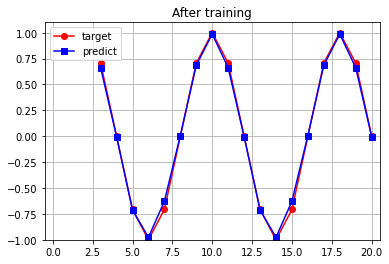

In [27]:
plt.plot(np.arange(3,21),y_train, 'ro-', label = 'target')
plt.plot(np.arange(3,21), model.predict(X_train), 'bs-', label = 'predict')
plt.xlim(-0.5, 20.5), plt.ylim(-1,1.1), plt.grid()
plt.legend(), plt.title('After training')
plt.show()


- 학습이 되니깐 거의 일치함

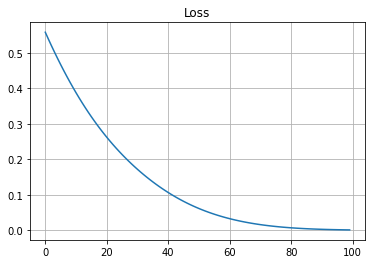

In [29]:
plt.plot(hist.history['loss'])
plt.title('Loss'), plt.grid()
plt.show()

In [ ]:
- 학습과정이 계속 줄어든다.